In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys
import seaborn as sn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

%matplotlib inline
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statistics

sys.path.append("code/.")

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import eli5
import shap
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Downloading the dataset: 
### Data from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [3]:
df = pd.read_csv("data/UCI_Credit_Card.csv", index_col = 0)
df.head()
df.rename(columns={"PAY_0": "PAY_1"}, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

## Data Splitting  

In [4]:
X = df.drop(columns = ["default.payment.next.month"])
y = df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,28695.0,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,87426.0,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0
25756,120000.0,2,2,1,30,0,0,0,0,0,...,104694.0,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0
1439,50000.0,1,2,2,54,1,2,0,0,0,...,27168.0,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0


<!-- END QUESTION -->

<br><br>

## EDA

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16396 to 19967
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  21000 non-null  float64
 1   SEX        21000 non-null  int64  
 2   EDUCATION  21000 non-null  int64  
 3   MARRIAGE   21000 non-null  int64  
 4   AGE        21000 non-null  int64  
 5   PAY_1      21000 non-null  int64  
 6   PAY_2      21000 non-null  int64  
 7   PAY_3      21000 non-null  int64  
 8   PAY_4      21000 non-null  int64  
 9   PAY_5      21000 non-null  int64  
 10  PAY_6      21000 non-null  int64  
 11  BILL_AMT1  21000 non-null  float64
 12  BILL_AMT2  21000 non-null  float64
 13  BILL_AMT3  21000 non-null  float64
 14  BILL_AMT4  21000 non-null  float64
 15  BILL_AMT5  21000 non-null  float64
 16  BILL_AMT6  21000 non-null  float64
 17  PAY_AMT1   21000 non-null  float64
 18  PAY_AMT2   21000 non-null  float64
 19  PAY_AMT3   21000 non-null  float64
 20  PA

From this I noticed that all features in this dataset have already been transformed into numeric features by some method.

In [6]:
X_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,-0.264429,...,47010.414095,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190
std,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,1.137205,...,69035.759516,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-157264.000000,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2663.750000,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20088.500000,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59895.000000,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000


I find it interesting that the mean for all of pay_X columns are negative, showing that the majority of individuals pay their credit card statements on time. I also notice that the the distribution of age tends to be younger than I expected, with the 75% quantile being only 41 with the mean being 35.5. 

In [7]:
corr_matrix = X_train.corr()
plt.figure(figsize = (100,100))
plt.rcParams.update({'font.size': 50})
sn.heatmap(corr_matrix, annot = True)

<AxesSubplot:>

In [8]:
sorted_mat = corr_matrix.unstack().sort_values()
print(sorted_mat[0:20])

AGE        MARRIAGE    -0.414446
MARRIAGE   AGE         -0.414446
PAY_2      LIMIT_BAL   -0.299924
LIMIT_BAL  PAY_2       -0.299924
           PAY_3       -0.289222
PAY_3      LIMIT_BAL   -0.289222
PAY_1      LIMIT_BAL   -0.271686
LIMIT_BAL  PAY_1       -0.271686
PAY_4      LIMIT_BAL   -0.269399
LIMIT_BAL  PAY_4       -0.269399
           PAY_5       -0.249030
PAY_5      LIMIT_BAL   -0.249030
PAY_6      LIMIT_BAL   -0.236218
LIMIT_BAL  PAY_6       -0.236218
           EDUCATION   -0.223207
EDUCATION  LIMIT_BAL   -0.223207
MARRIAGE   EDUCATION   -0.142499
EDUCATION  MARRIAGE    -0.142499
MARRIAGE   LIMIT_BAL   -0.115202
LIMIT_BAL  MARRIAGE    -0.115202
dtype: float64


From this correlation matrix I can see that all features under the same category (ie. Pay, Bill_amt) are highly correlated, besides the values for PAY_AMT. This follows as expected. I also notice fairly large correlations between the Pay Amount and the bill amount for the following month. If an individual pays less the month before it seems obvious that the bill the next month will be higher, once again following as expected. Otherwise, the highest correlations are between the numeric columns such as balance limit, bill amount, and pay amount. However some of the lowest correlations come from either the non-money related features (ie. Age and marriage, Marriage and education), along with many of the negative correlations coming from the balance limit and repayment status. 

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

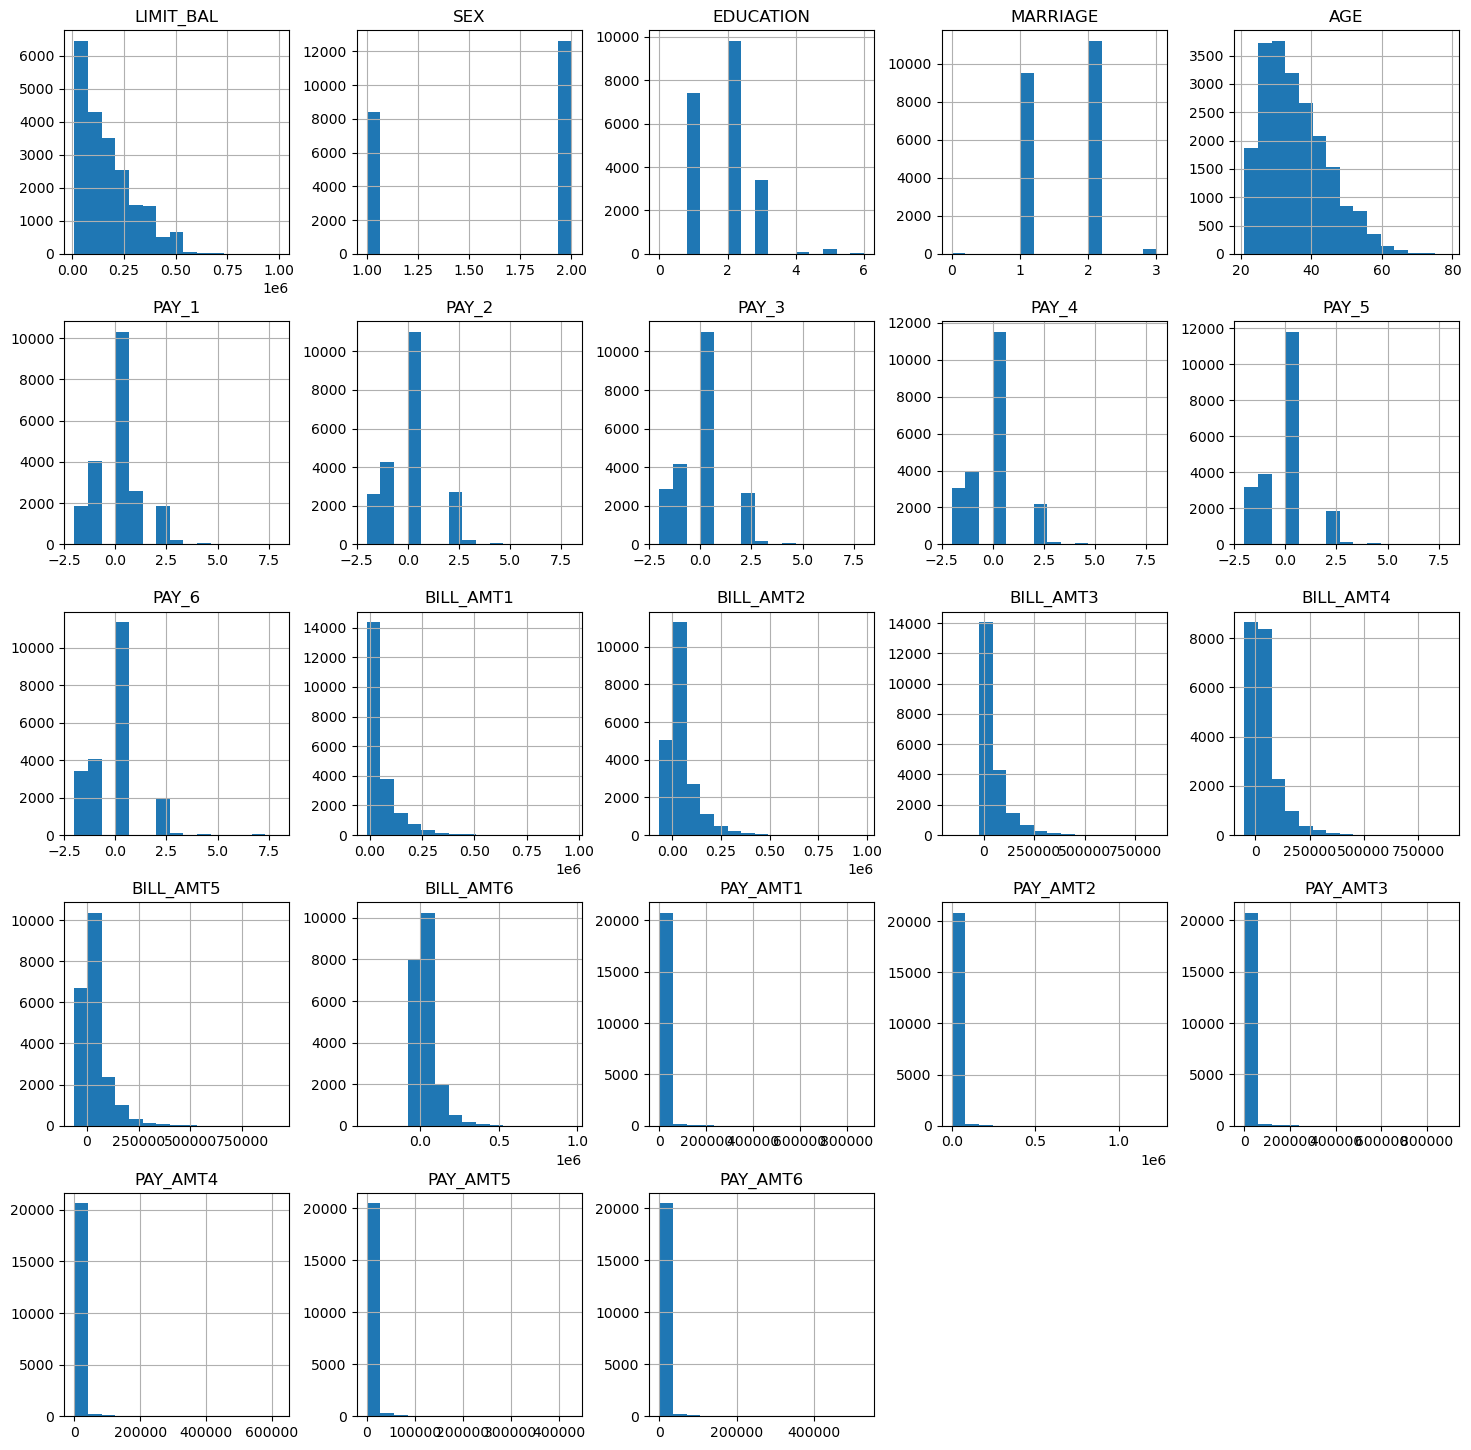

In [9]:
plt.rcParams.update({'font.size': 10})
X_train.hist(bins = 15, figsize = (18,18))

These histograms illustrate the nearly all of the continuous numeric features are left skewed. The histograms of Pay illustrate that most individuals either pay duly or take approximately one month extra to pay off their statement. The most widely distributed features are balance limit and age. 

This is an entirely numeric dataset that will require a large amount of scaling and one-hot encoding for many of the integer features such as education, marriage and repayment status. Besides the features in the same "category" (ie. Bill_AMT1 and BILL_AMT2), none of the features have correlations with an extremely large magnitude. Some of the features are likely able to be dropped due to the large size of the dataset, which will be explored later on. Age is a difficult column to deal with, as it does not make sense to scale it on one-hot encoding would lead to an extremely large number of features. In further sections I will examine its importance in the predictor, but it is likely to be dropped. The monthly repayment status features will also likely be dropped, as these seem quite redundant as an individual who is delaying payments will often continue to do this. I plan to create a column representing the sum and the mean of the repayment status columns however to still represent this factor. 

For this analysis I will use accuracy as a basic metric, a confusion matrix to illustrate the false-positives/negatives (in this case we would rather have more false positives as undetected default payments can really hurt the bank) and AP score to evaluate my model.

<!-- END QUESTION -->

<br><br>

## Feature Engineering

In [10]:
def total_vals(colname, data):
    """
    Returns the sum of the specified columns
    
    Parameters:
    colname: the name of the column(s) 
    data: the dataframe used
    
    Returns: 
    The sum of the specified columns (float)
    """
    sum = 0
    for i in range (1,6):
        val = data[colname + str(i)]
        sum = sum + val
    return sum 


def mean_vals(colname, data):
    """
    Returns the mean of the specified columns
    
    Parameters:
    colname: the name of the column(s) 
    data: the dataframe used
    
    Returns: 
    The mean of the specified columns (float)
    """
    sum = 0
    for i in range (1,6):
        val = data[colname + str(i)]
        sum = sum + val
    return sum/6 

                              
        

In [11]:
X_train["Sum_PAY"] = total_vals("PAY_", X_train)
X_train["Sum_BILL_AMT"] = total_vals("BILL_AMT", X_train)
X_train["Sum_PAY_AMT"] = total_vals("PAY_AMT", X_train)
X_train["Avg_PAY"] = mean_vals("PAY_", X_train)
X_train["Avg_BILL_AMT"] = mean_vals("BILL_AMT", X_train)
X_train["Avg_PAY_AMT"] = mean_vals("PAY_AMT", X_train)
X_test["Sum_PAY"] = total_vals("PAY_", X_test)
X_test["Sum_BILL_AMT"] = total_vals("BILL_AMT", X_test)
X_test["Sum_PAY_AMT"] = total_vals("PAY_AMT", X_test)
X_test["Avg_PAY"] = mean_vals("PAY_", X_test)
X_test["Avg_BILL_AMT"] = mean_vals("BILL_AMT", X_test)
X_test["Avg_PAY_AMT"] = mean_vals("PAY_AMT", X_test)
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sum_PAY,Sum_BILL_AMT,Sum_PAY_AMT,Avg_PAY,Avg_BILL_AMT,Avg_PAY_AMT
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,1000.0,3000.0,0.0,7013.0,0,115425.0,14018.0,0.000000,19237.500000,2336.333333
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,130007.0,3018.0,15000.0,51663.0,-3,410956.0,236063.0,-0.500000,68492.666667,39343.833333
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,-10,-90.0,0.0,-1.666667,-15.000000,0.000000
25756,120000.0,2,2,1,30,0,0,0,0,0,...,4204.0,3017.0,2005.0,1702.0,0,483303.0,18434.0,0.000000,80550.500000,3072.333333
1439,50000.0,1,2,2,54,1,2,0,0,0,...,1200.0,1500.0,1000.0,1500.0,3,177701.0,5100.0,0.500000,29616.833333,850.000000


## Preprocessing and Transformations

In [12]:
X_train.info()
X_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16396 to 19967
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     21000 non-null  float64
 1   SEX           21000 non-null  int64  
 2   EDUCATION     21000 non-null  int64  
 3   MARRIAGE      21000 non-null  int64  
 4   AGE           21000 non-null  int64  
 5   PAY_1         21000 non-null  int64  
 6   PAY_2         21000 non-null  int64  
 7   PAY_3         21000 non-null  int64  
 8   PAY_4         21000 non-null  int64  
 9   PAY_5         21000 non-null  int64  
 10  PAY_6         21000 non-null  int64  
 11  BILL_AMT1     21000 non-null  float64
 12  BILL_AMT2     21000 non-null  float64
 13  BILL_AMT3     21000 non-null  float64
 14  BILL_AMT4     21000 non-null  float64
 15  BILL_AMT5     21000 non-null  float64
 16  BILL_AMT6     21000 non-null  float64
 17  PAY_AMT1      21000 non-null  float64
 18  PAY_AMT2      21000 no

(21000, 29)

In [13]:
scaling_feats = ["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1",
                 "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "Sum_PAY", "Sum_BILL_AMT", "Sum_PAY_AMT", 
                 "Avg_PAY", "Avg_BILL_AMT", "Avg_PAY_AMT"] ## apply scaling
onehot_feats = ["EDUCATION", "MARRIAGE"] ## apply one-hot encoding
passthrough_feats = ["SEX"] ## pass through
drop_feats = ["AGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"] ## drop

In [14]:
ct = make_column_transformer(
    (StandardScaler(), scaling_feats), 
    (OneHotEncoder(), onehot_feats), 
    ("passthrough", passthrough_feats), 
    ("drop", drop_feats))
    
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'Sum_PAY', 'Sum_BILL_AMT',
                                  'Sum_PAY_AMT', 'Avg_PAY', 'Avg_BILL_AMT',
                                  'Avg_PAY_AMT']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('passthrough', 'passthrough', ['SEX']),
                                ('drop', 'drop',
                                 ['AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6'])])

In [15]:
transformed_X_train = ct.fit_transform(X_train)
transformed_X_test = ct.transform(X_test)
transformed_X_test

array([[-0.98218942, -0.30114169, -0.34644822, ...,  1.        ,
         0.        ,  2.        ],
       [-0.67496877,  0.33433596,  0.29337065, ...,  0.        ,
         0.        ,  2.        ],
       [ 0.01627769,  1.42700186,  1.53634086, ...,  1.        ,
         0.        ,  2.        ],
       ...,
       [-1.2126049 , -0.61467994, -0.58799448, ...,  1.        ,
         0.        ,  2.        ],
       [-1.05899458, -0.69588645, -0.65611932, ...,  0.        ,
         0.        ,  1.        ],
       [-1.05899458, -0.31605133, -0.26875733, ...,  0.        ,
         0.        ,  2.        ]])

In [16]:
col_names = (
    scaling_feats   
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
    + passthrough_feats 
)
col_names

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Sum_PAY',
 'Sum_BILL_AMT',
 'Sum_PAY_AMT',
 'Avg_PAY',
 'Avg_BILL_AMT',
 'Avg_PAY_AMT',
 'EDUCATION_0',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'SEX']

In [17]:
X_train_transformed = pd.DataFrame(transformed_X_train, columns = col_names)
X_test_transformed = pd.DataFrame(transformed_X_test, columns = col_names)
X_train_transformed.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,SEX
0,1.168355,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,-0.234603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,2.090017,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,6.785208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,-0.060527,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,-0.289017,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,-0.367748,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,-0.060260,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,-0.905384,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,-0.223720,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


<!-- END QUESTION -->

<br><br>

## Baseline Model

In [18]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [19]:
results = {}
ap_scores = {}
dc = DummyClassifier()
pipe = make_pipeline(ct, dc)
dc.fit(X_train, y_train)
results["dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score = True)
pd.DataFrame(results)

,dummy
fit_time,0.009 (+/- 0.002)
score_time,0.003 (+/- 0.000)
test_score,0.777 (+/- 0.000)
train_score,0.777 (+/- 0.000)


In [20]:
ap_scores["dummy"]  = average_precision_score(y_train, pipe.predict_proba(X_train)[:, 1])
ap_scores

{'dummy': 0.22323809523809524}

<!-- END QUESTION -->

<br><br>

## Linear Models

In [21]:
pipe_linear_test = make_pipeline(ct, LogisticRegression(max_iter = 1000))

In [22]:
param_grid_linear = {"logisticregression__C" : [0.001,0.01,0.1,1,10,100,1000]}
random_search_linear = RandomizedSearchCV(pipe_linear_test, param_grid_linear, n_iter = 100, cv = 5, n_jobs = -1,random_state = 123
                                  )
random_search_linear.fit(X_train, y_train)
results_lin = pd.DataFrame(random_search_linear.cv_results_).set_index("rank_test_score").sort_index()
results_lin.T

The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.


rank_test_score,1,2,3,3,3,6,7
mean_fit_time,0.195659,0.439969,0.537972,0.482722,0.412883,0.104491,0.064057
std_fit_time,0.019066,0.036665,0.04013,0.052928,0.044463,0.012617,0.005458
mean_score_time,0.011063,0.011351,0.012344,0.008361,0.004936,0.011759,0.007038
std_score_time,0.004058,0.003271,0.004969,0.002589,0.001257,0.003965,0.003032
param_logisticregression__C,0.1,1,10,100,1000,0.01,0.001
params,{'logisticregression__C': 0.1},{'logisticregression__C': 1},{'logisticregression__C': 10},{'logisticregression__C': 100},{'logisticregression__C': 1000},{'logisticregression__C': 0.01},{'logisticregression__C': 0.001}
split0_test_score,0.801667,0.80119,0.800952,0.800952,0.800952,0.800476,0.795238
split1_test_score,0.802619,0.802619,0.802619,0.802619,0.802619,0.801905,0.797381
split2_test_score,0.801667,0.801667,0.801667,0.801667,0.801667,0.801905,0.79381
split3_test_score,0.79619,0.795952,0.795952,0.795952,0.795714,0.79619,0.791667


In [23]:
pipe_linear = make_pipeline(ct, LogisticRegression(C = 0.1, max_iter = 1000))
results["linear"] = mean_std_cross_val_scores(pipe_linear, X_train, y_train, return_train_score = True)
pd.DataFrame(results)

,dummy,linear
fit_time,0.009 (+/- 0.002),0.119 (+/- 0.007)
score_time,0.003 (+/- 0.000),0.004 (+/- 0.000)
test_score,0.777 (+/- 0.000),0.800 (+/- 0.003)
train_score,0.777 (+/- 0.000),0.799 (+/- 0.001)


In [24]:
pipe_linear.fit(X_train, y_train)
ap_scores["linear"] = average_precision_score(y_train, pipe_linear.predict_proba(X_train)[:, 1])
ap_scores

{'dummy': 0.22323809523809524, 'linear': 0.47762123788907707}

<!-- END QUESTION -->

<br><br>

Using logistic regression produces a better score than the dummy classifier. The validation scores are all very similar as the standard deviation is very low, and there doesn't appear to be much overfitting or underfitting as the train and test scores are very similar as well. 

## Gradient Boosted Models

In [25]:
pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state = 123, n_jobs = -1))
results["Random Forest"] = mean_std_cross_val_scores(pipe_rf, X_train, y_train, return_train_score = True)
pipe_xg = make_pipeline(ct, XGBClassifier(random_state = 123, eval_metric = "logloss", verbosity = 0))
results["XGB"] = mean_std_cross_val_scores(pipe_xg, X_train, y_train, return_train_score = True)
pipe_cat = make_pipeline(ct, CatBoostClassifier(verbose=0, random_state=123))
results["CatBoost"] = mean_std_cross_val_scores(pipe_cat, X_train, y_train, return_train_score = True)
pd.DataFrame(results)                    

,dummy,linear,Random Forest,XGB,CatBoost
fit_time,0.009 (+/- 0.002),0.119 (+/- 0.007),0.955 (+/- 0.069),1.320 (+/- 0.085),5.039 (+/- 0.244)
score_time,0.003 (+/- 0.000),0.004 (+/- 0.000),0.038 (+/- 0.004),0.009 (+/- 0.001),0.028 (+/- 0.001)
test_score,0.777 (+/- 0.000),0.800 (+/- 0.003),0.803 (+/- 0.004),0.801 (+/- 0.005),0.806 (+/- 0.003)
train_score,0.777 (+/- 0.000),0.799 (+/- 0.001),0.996 (+/- 0.001),0.901 (+/- 0.003),0.856 (+/- 0.002)


In [26]:
pipe_rf.fit(X_train, y_train)
ap_scores["random forest"] = average_precision_score(y_train, pipe_rf.predict_proba(X_train)[:, 1])

In [27]:
pipe_xg.fit(X_train, y_train)
ap_scores["XGB"] = average_precision_score(y_train, pipe_xg.predict_proba(X_train)[:, 1])

In [28]:
pipe_cat.fit(X_train, y_train)
ap_scores["CatBoost"] = average_precision_score(y_train, pipe_cat.predict_proba(X_train)[:, 1])
ap_scores

{'dummy': 0.22323809523809524,
 'linear': 0.47762123788907707,
 'random forest': 0.999152138665604,
 'XGB': 0.861977124585315,
 'CatBoost': 0.7323486330212109}

In terms of accuracy, CatBoost provides the most accurate model for the dataset. All three models overfit the training data to some extent, with random forest extremely overfitting and XGB and CatBoost just slightly overfitting. CatBoost takes a large amount longer to compute the scores than all of the other models, followed by XGB and Random Forest. 

In terms of AP score, random forest easily provides the best model for the data. However this cannot be entirely confirmed as this is just based on the training data and the extreme overfitting that random forest uses likely contributes to the high AP score. XGB provides the second highest AP score and therefore may be the model of choice. 

## Feature Selection

In [29]:
pipe_forward_rf = make_pipeline(
    ct,
    SequentialFeatureSelector(LogisticRegression(max_iter=1000), 
                              direction="forward", 
                              n_features_to_select='auto', 
                              tol=None),
    RandomForestClassifier(random_state = 123, n_jobs = -1),
)

pipe_forward_xgb = make_pipeline(
    ct,
    SequentialFeatureSelector(LogisticRegression(max_iter=1000), 
                              direction="forward", 
                              n_features_to_select='auto', 
                              tol=None),
    XGBClassifier(random_state = 123, eval_metric = "logloss", verbosity = 0),
)

pipe_forward_cat = make_pipeline(
    ct,
    SequentialFeatureSelector(LogisticRegression(max_iter=1000), 
                              direction="forward", 
                              n_features_to_select='auto', 
                              tol=None),
    CatBoostClassifier(verbose=0, random_state=123),
)


results["RandomForestSelected"] = mean_std_cross_val_scores(pipe_forward_rf, X_train, y_train, return_train_score = True)
results["XGBSelected"] = mean_std_cross_val_scores(pipe_forward_xgb, X_train, y_train, return_train_score = True)
results["CatBoostSelected"] = mean_std_cross_val_scores(pipe_forward_cat, X_train, y_train, return_train_score = True)
pd.DataFrame(results)

,dummy,linear,Random Forest,XGB,CatBoost,RandomForestSelected,XGBSelected,CatBoostSelected
fit_time,0.009 (+/- 0.002),0.119 (+/- 0.007),0.955 (+/- 0.069),1.320 (+/- 0.085),5.039 (+/- 0.244),38.103 (+/- 2.590),37.679 (+/- 2.144),41.043 (+/- 1.683)
score_time,0.003 (+/- 0.000),0.004 (+/- 0.000),0.038 (+/- 0.004),0.009 (+/- 0.001),0.028 (+/- 0.001),0.030 (+/- 0.001),0.008 (+/- 0.000),0.006 (+/- 0.000)
test_score,0.777 (+/- 0.000),0.800 (+/- 0.003),0.803 (+/- 0.004),0.801 (+/- 0.005),0.806 (+/- 0.003),0.789 (+/- 0.005),0.802 (+/- 0.002),0.806 (+/- 0.002)
train_score,0.777 (+/- 0.000),0.799 (+/- 0.001),0.996 (+/- 0.001),0.901 (+/- 0.003),0.856 (+/- 0.002),0.977 (+/- 0.005),0.856 (+/- 0.006),0.833 (+/- 0.003)


In [30]:
pipe_forward_rf.fit(X_train, y_train)
ap_scores["random forest selected"] = average_precision_score(y_train, pipe_forward_rf.predict_proba(X_train)[:, 1])

In [31]:
pipe_forward_xgb.fit(X_train, y_train)
ap_scores["XGBselected"] = average_precision_score(y_train, pipe_forward_xgb.predict_proba(X_train)[:, 1])

In [32]:
pipe_forward_cat.fit(X_train, y_train)
ap_scores["CatBoostselected"] = average_precision_score(y_train, pipe_forward_cat.predict_proba(X_train)[:, 1])

In [33]:
ap_scores

{'dummy': 0.22323809523809524,
 'linear': 0.47762123788907707,
 'random forest': 0.999152138665604,
 'XGB': 0.861977124585315,
 'CatBoost': 0.7323486330212109,
 'random forest selected': 0.8787104587115167,
 'XGBselected': 0.6295933696555848,
 'CatBoostselected': 0.6043520482584582}

Feature selection seems to provide no benefit to the models. 

## Hyperparameter Optimization

In [34]:
param_grid_rf = {"randomforestclassifier__max_depth" : [2,4,6,8,10,12,14,16,18,20],
               "randomforestclassifier__n_estimators" : [2,4,6,8,10,12,14,16,18,20]}
random_search_rf = RandomizedSearchCV(pipe_rf, param_grid_rf, n_iter = 100, cv = 5, n_jobs = -1,random_state = 123
                                  )
random_search_rf.fit(X_train, y_train)
results_rf = pd.DataFrame(random_search_rf.cv_results_).set_index("rank_test_score").sort_index()
results_rf.T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
mean_fit_time,0.40212,0.42231,0.46414,0.550102,0.366054,0.303531,0.14255,0.281069,0.2141,0.425401,...,0.159121,0.109636,0.099814,0.15086,0.093784,0.131055,0.146029,0.137874,0.117271,0.137069
std_fit_time,0.065531,0.092313,0.079369,0.08855,0.081225,0.040669,0.074819,0.046243,0.054709,0.060558,...,0.014212,0.023386,0.030593,0.02236,0.025913,0.048346,0.050509,0.050128,0.062327,0.033602
mean_score_time,0.0269,0.050981,0.024361,0.026752,0.031519,0.047603,0.040213,0.060703,0.089062,0.043141,...,0.04079,0.030339,0.026817,0.02624,0.029872,0.015543,0.016849,0.013512,0.014688,0.024294
std_score_time,0.002462,0.017345,0.006812,0.00312,0.019037,0.029752,0.051566,0.032989,0.028486,0.021492,...,0.03461,0.008074,0.007423,0.015808,0.01367,0.003689,0.00319,0.002225,0.002489,0.008627
param_randomforestclassifier__n_estimators,20,16,18,20,12,10,10,14,12,16,...,4,8,4,4,6,2,2,2,2,2
param_randomforestclassifier__max_depth,6,6,6,8,8,8,6,6,6,8,...,18,2,2,20,2,12,18,14,16,20
params,"{'randomforestclassifier__n_estimators': 20, '...","{'randomforestclassifier__n_estimators': 16, '...","{'randomforestclassifier__n_estimators': 18, '...","{'randomforestclassifier__n_estimators': 20, '...","{'randomforestclassifier__n_estimators': 12, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 10, '...","{'randomforestclassifier__n_estimators': 14, '...","{'randomforestclassifier__n_estimators': 12, '...","{'randomforestclassifier__n_estimators': 16, '...",...,"{'randomforestclassifier__n_estimators': 4, 'r...","{'randomforestclassifier__n_estimators': 8, 'r...","{'randomforestclassifier__n_estimators': 4, 'r...","{'randomforestclassifier__n_estimators': 4, 'r...","{'randomforestclassifier__n_estimators': 6, 'r...","{'randomforestclassifier__n_estimators': 2, 'r...","{'randomforestclassifier__n_estimators': 2, 'r...","{'randomforestclassifier__n_estimators': 2, 'r...","{'randomforestclassifier__n_estimators': 2, 'r...","{'randomforestclassifier__n_estimators': 2, 'r..."
split0_test_score,0.808333,0.806667,0.807143,0.804286,0.80381,0.802857,0.806667,0.806667,0.806429,0.803571,...,0.77619,0.776905,0.777381,0.77881,0.777143,0.75881,0.759524,0.749762,0.76119,0.754762
split1_test_score,0.807619,0.806429,0.807381,0.805476,0.805952,0.805476,0.805714,0.806667,0.806667,0.805714,...,0.771667,0.776905,0.776905,0.775,0.776905,0.778571,0.756667,0.762619,0.749286,0.759286
split2_test_score,0.812619,0.812381,0.811905,0.811667,0.812143,0.810476,0.810952,0.810952,0.81119,0.812381,...,0.78,0.779048,0.776667,0.780238,0.776667,0.77,0.763571,0.770714,0.755476,0.759048


In [35]:
param_grid_xgb = {"xgbclassifier__max_depth" : [2,4,6,8,10,12,14,16,18,20],
               "xgbclassifier__learning_rate" : [0.001,0.01,0.1,0.2,0.3,0.4]}
random_search_xgb = RandomizedSearchCV(pipe_xg, param_grid_xgb, n_iter = 40, cv = 5, n_jobs = -1,random_state = 123
                                  )
random_search_xgb.fit(X_train, y_train)
results_xgb = pd.DataFrame(random_search_xgb.cv_results_).set_index("rank_test_score").sort_index()
results_xgb.T

rank_test_score,1,2,3,4,5,6,7,7,9,10,...,31,32,33,34,35,36,37,38,39,40
mean_fit_time,2.197954,4.435733,2.213611,4.242,2.246806,2.221564,6.510809,2.207395,2.187946,4.196107,...,19.015388,15.332816,17.060898,13.829636,18.691623,11.449716,14.462358,16.53409,18.219489,19.69456
std_fit_time,0.105338,0.093438,0.0744,0.089139,0.046666,0.041707,0.081054,0.077553,0.047302,0.028102,...,0.21214,0.090015,0.138109,0.183323,0.114724,0.149446,0.043672,0.094397,0.233022,0.337767
mean_score_time,0.018286,0.02991,0.017892,0.020745,0.020128,0.016901,0.023954,0.020042,0.017476,0.022995,...,0.075217,0.070345,0.067291,0.061917,0.085061,0.062056,0.060508,0.071818,0.069414,0.08684
std_score_time,0.005045,0.013637,0.003418,0.005343,0.003115,0.003312,0.004801,0.008563,0.00373,0.006876,...,0.009493,0.01192,0.009277,0.011739,0.009033,0.014721,0.008728,0.008192,0.005533,0.011732
param_xgbclassifier__max_depth,2,4,2,4,2,2,6,2,2,4,...,18,14,16,12,18,10,12,14,16,18
param_xgbclassifier__learning_rate,0.1,0.01,0.2,0.1,0.01,0.001,0.01,0.3,0.4,0.001,...,0.3,0.4,0.4,0.4,0.4,0.4,0.001,0.001,0.001,0.001
params,"{'xgbclassifier__max_depth': 2, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...","{'xgbclassifier__max_depth': 2, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...","{'xgbclassifier__max_depth': 2, 'xgbclassifier...","{'xgbclassifier__max_depth': 2, 'xgbclassifier...","{'xgbclassifier__max_depth': 6, 'xgbclassifier...","{'xgbclassifier__max_depth': 2, 'xgbclassifier...","{'xgbclassifier__max_depth': 2, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...",...,"{'xgbclassifier__max_depth': 18, 'xgbclassifie...","{'xgbclassifier__max_depth': 14, 'xgbclassifie...","{'xgbclassifier__max_depth': 16, 'xgbclassifie...","{'xgbclassifier__max_depth': 12, 'xgbclassifie...","{'xgbclassifier__max_depth': 18, 'xgbclassifie...","{'xgbclassifier__max_depth': 10, 'xgbclassifie...","{'xgbclassifier__max_depth': 12, 'xgbclassifie...","{'xgbclassifier__max_depth': 14, 'xgbclassifie...","{'xgbclassifier__max_depth': 16, 'xgbclassifie...","{'xgbclassifier__max_depth': 18, 'xgbclassifie..."
split0_test_score,0.805952,0.805714,0.804286,0.805,0.805,0.805,0.806429,0.805,0.804286,0.80381,...,0.794762,0.794762,0.79119,0.79,0.792381,0.789048,0.794524,0.786429,0.784286,0.781429
split1_test_score,0.808095,0.807619,0.810238,0.807857,0.805238,0.805238,0.808333,0.806905,0.806667,0.807619,...,0.791429,0.79119,0.79,0.791905,0.792143,0.791905,0.783571,0.780476,0.781667,0.77881
split2_test_score,0.814762,0.812381,0.81381,0.812381,0.813333,0.811667,0.81,0.814524,0.814762,0.811429,...,0.803333,0.802619,0.802143,0.801905,0.799524,0.795952,0.798571,0.796667,0.794762,0.793095


In [36]:
param_grid_cat = {"catboostclassifier__learning_rate" : [0.001,0.01,0.1,0.2],
                  "catboostclassifier__n_estimators" : [10,50,100,200,300]}
random_search_cat = RandomizedSearchCV(pipe_cat, param_grid_cat, n_iter = 20, cv = 5, n_jobs = -1, random_state = 123)
random_search_cat.fit(X_train, y_train)
results_cat = pd.DataFrame(random_search_cat.cv_results_).set_index("rank_test_score").sort_index()
results_cat.T

rank_test_score,1,2,3,4,5,5,7,8,8,10,11,12,13,14,15,16,17,18,19,20
mean_fit_time,2.267528,3.742574,0.890863,0.2889,0.625928,1.44083,2.379654,1.442124,1.175468,5.323039,0.942126,0.287058,0.502923,0.297969,0.794191,1.403693,4.220495,2.695769,2.682829,3.162348
std_fit_time,0.084855,0.135166,0.379771,0.063977,0.025605,0.051753,0.120039,0.046405,0.04984,2.109533,0.151561,0.028776,0.011821,0.025943,0.045757,0.077385,0.257183,0.11145,0.062157,0.418339
mean_score_time,0.036044,0.04373,0.03592,0.036362,0.03409,0.034549,0.036883,0.049907,0.033678,0.03577,0.052596,0.037328,0.041916,0.041316,0.041045,0.04111,0.046106,0.045919,0.034698,0.027902
std_score_time,0.008399,0.004012,0.010241,0.008753,0.003147,0.004133,0.007908,0.014278,0.00252,0.003519,0.006885,0.00516,0.004379,0.00494,0.004039,0.005466,0.006201,0.002992,0.00513,0.001222
param_catboostclassifier__n_estimators,200,300,50,10,50,100,200,100,100,300,50,10,10,10,50,100,300,200,200,300
param_catboostclassifier__learning_rate,0.01,0.01,0.1,0.01,0.01,0.1,0.001,0.001,0.01,0.001,0.001,0.1,0.001,0.2,0.2,0.2,0.1,0.1,0.2,0.2
params,"{'catboostclassifier__n_estimators': 200, 'cat...","{'catboostclassifier__n_estimators': 300, 'cat...","{'catboostclassifier__n_estimators': 50, 'catb...","{'catboostclassifier__n_estimators': 10, 'catb...","{'catboostclassifier__n_estimators': 50, 'catb...","{'catboostclassifier__n_estimators': 100, 'cat...","{'catboostclassifier__n_estimators': 200, 'cat...","{'catboostclassifier__n_estimators': 100, 'cat...","{'catboostclassifier__n_estimators': 100, 'cat...","{'catboostclassifier__n_estimators': 300, 'cat...","{'catboostclassifier__n_estimators': 50, 'catb...","{'catboostclassifier__n_estimators': 10, 'catb...","{'catboostclassifier__n_estimators': 10, 'catb...","{'catboostclassifier__n_estimators': 10, 'catb...","{'catboostclassifier__n_estimators': 50, 'catb...","{'catboostclassifier__n_estimators': 100, 'cat...","{'catboostclassifier__n_estimators': 300, 'cat...","{'catboostclassifier__n_estimators': 200, 'cat...","{'catboostclassifier__n_estimators': 200, 'cat...","{'catboostclassifier__n_estimators': 300, 'cat..."
split0_test_score,0.806429,0.806429,0.80381,0.806905,0.804762,0.805714,0.805,0.804762,0.805238,0.804762,0.805238,0.804762,0.805952,0.804286,0.802381,0.801905,0.803095,0.8,0.799286,0.797619
split1_test_score,0.81119,0.809762,0.807857,0.81,0.809524,0.806905,0.809762,0.809762,0.810238,0.809286,0.808571,0.809048,0.808333,0.807857,0.809762,0.809524,0.805476,0.806429,0.804048,0.802619
split2_test_score,0.813095,0.814762,0.815714,0.812381,0.813571,0.814524,0.813571,0.814048,0.812381,0.813571,0.812857,0.812143,0.81119,0.81119,0.813571,0.812857,0.812619,0.811429,0.809286,0.81119


Model used will be XGB with max_depth = 2 and learning_rate = 0.1 as this provides a better AP score than CatBoost. 

<!-- END QUESTION -->

<br><br>

## Interpretation and Feature Importances:

In [37]:
pipe_xgb_opt = make_pipeline(ct, XGBClassifier(max_depth = 2, learning_rate = 0.1, 
                                               random_state = 123, eval_metric = "logloss", verbosity = 0))

In [38]:
## Code from Lecture 12
pipe_xgb_opt.fit(X_train, y_train)
xgb_explainer = shap.TreeExplainer(pipe_xgb_opt.named_steps["xgbclassifier"])
train_xgb_shap_values = xgb_explainer.shap_values(X_train_transformed)
train_xgb_shap_values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


array([[-1.93626702e-01, -1.81650594e-01, -6.34514354e-03, ...,
        -2.74772588e-02, -5.40906476e-05, -1.91700384e-02],
       [-1.81022391e-01,  2.06587374e-01,  3.74433808e-02, ...,
        -6.04348443e-03, -5.40906476e-05, -2.39996277e-02],
       [-2.56496202e-02,  1.57148734e-01, -5.43558737e-03, ...,
         2.32516807e-02, -5.40906476e-05, -4.51059155e-02],
       ...,
       [ 1.56268522e-01, -1.38223588e-01, -6.34514354e-03, ...,
         2.84657478e-02, -5.40906476e-05, -3.38821262e-02],
       [ 1.41764984e-01, -1.49718136e-01, -6.82963245e-03, ...,
        -2.36220248e-02, -5.40906476e-05, -1.27758365e-02],
       [-1.29521042e-01,  7.23993704e-02, -7.14602927e-03, ...,
         3.19477059e-02, -5.40906476e-05, -4.02763300e-02]], dtype=float32)

In [39]:
values = np.abs(train_xgb_shap_values).mean(
    0
)  # mean of shapely values in each column
pd.DataFrame(data=values, index=col_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
Sum_PAY,0.674329
BILL_AMT1,0.130560
LIMIT_BAL,0.125607
Sum_PAY_AMT,0.119953
PAY_AMT1,0.072996
Sum_BILL_AMT,0.062640
PAY_AMT2,0.052193
MARRIAGE_2,0.036834
PAY_AMT3,0.035961
SEX,0.033157


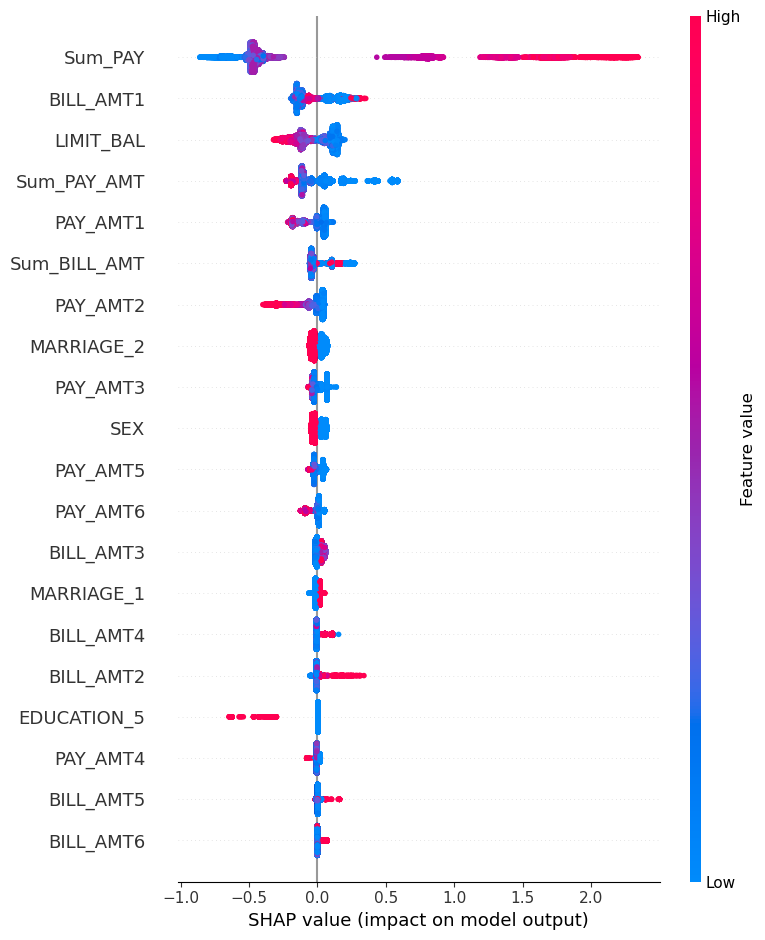

In [40]:
shap.initjs()
shap.summary_plot(train_xgb_shap_values, X_train_transformed)

From the shap plots above I can see that the Sum_PAY feature has the largest importance within the model for large value of this feature. Smaller values of this feature do not have much importance however. Bill_AMT1 and LIMIT_BAL also have strong importances within the model. The monthly values for BILL_AMT appear to be the least important of the features. 

<!-- END QUESTION -->

<br><br>

## Results on the test set 

In [41]:
pipe_xgb_opt.score(X_test, y_test)

0.808

The test score is quite similar to the score provided from cross validation. From this observation I do trust the results produced. This also alludes that there is minimal optimization bias in the model. 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


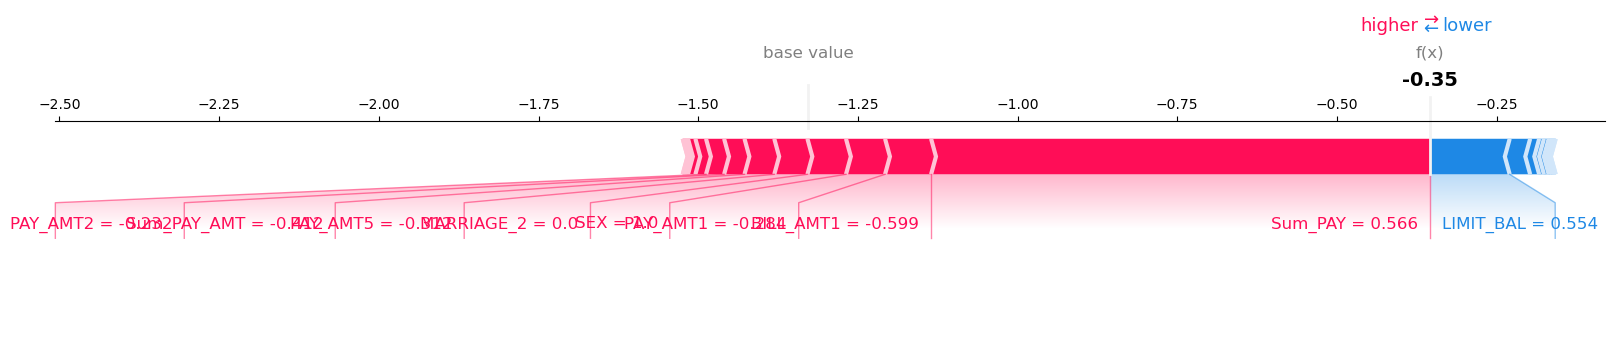

In [42]:
y_test_reset = y_test.reset_index(drop = True)
non_default_ind = y_test_reset[y_test_reset == 0].index.tolist()
default_ind = y_test_reset[y_test_reset == 1].index.tolist()
ex_default_index = default_ind[10]
ex_non_default_index = non_default_ind[10]

pipe_xgb_opt.named_steps["xgbclassifier"].classes_

X_test_enc = pd.DataFrame(
    data = ct.transform(X_test),
    columns = col_names,
    index = X_test.index,
)
X_test_enc = round(X_test_enc, 3)

xgb_explainer = shap.TreeExplainer(pipe_xgb_opt.named_steps["xgbclassifier"])

test_xgb_shap_values = xgb_explainer.shap_values(X_test_enc)

shap.force_plot(
    xgb_explainer.expected_value,
    test_xgb_shap_values[ex_default_index, :],
    X_test_enc.iloc[ex_default_index, :],
    matplotlib = True,
)

- The raw model score is larger than the base value, which is reflected in the prediction of default class
- Sum_PAY = 0.57, PAY_AMT1 = -0.6 are pushing the prediction towards higher score
- LIMIT_BAL = 0.55 is pushing the prediction towards a lower score

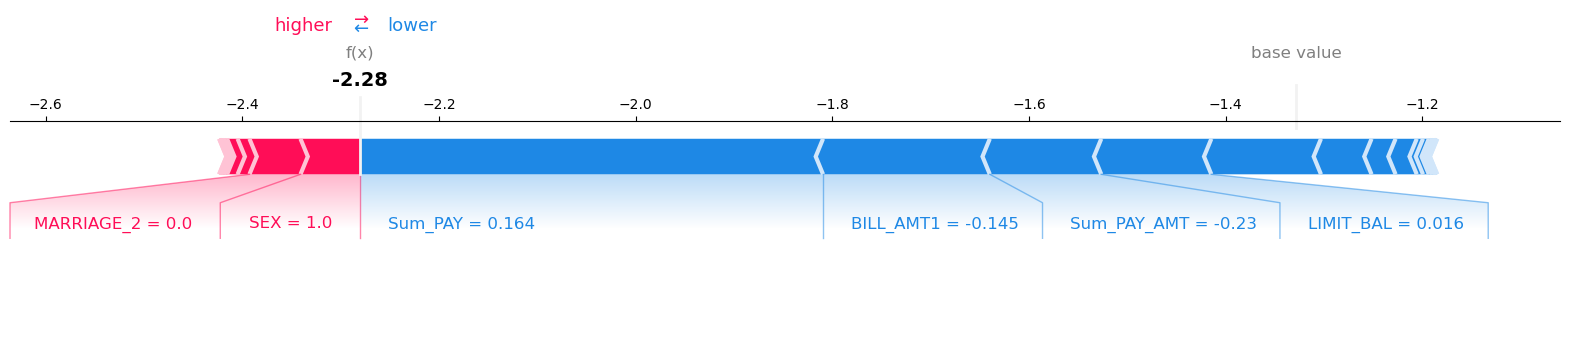

In [43]:
shap.force_plot(
    xgb_explainer.expected_value,
    test_xgb_shap_values[ex_non_default_index, :],
    X_test_enc.iloc[ex_non_default_index, :],
    matplotlib = True,
)

- The raw model score is smaller than the base value, which is reflected in the prediction of default class
- SEX = 1.0 and MARRIAGE_2 = 0.0 are pushing the prediction towards higher score
- Sum_PAY, BILL_AMT1, SUM_PAY_AMT, and LIMIT_BAL are pushing the prediction towards a lower score

<!-- END QUESTION -->

<br><br>

## Summary of Results

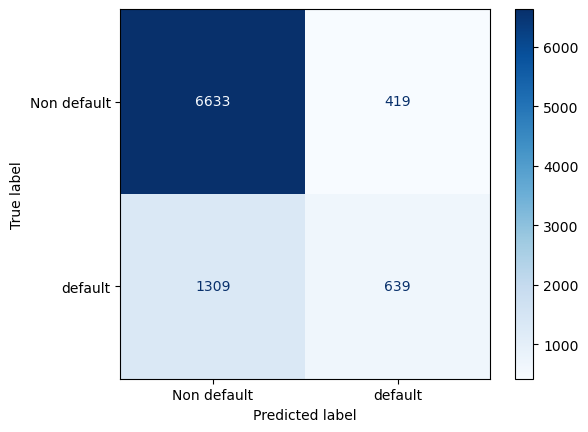

In [44]:
ConfusionMatrixDisplay.from_estimator(
    pipe_xgb_opt,
    X_test,
    y_test,
    display_labels=["Non default", "default"],
    values_format="d",
    cmap=plt.cm.Blues,
);

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#from lecture 9
predictions = pipe_xgb_opt.predict(X_test)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
data = {
    "calculation": [],
    "accuracy": [],
    "error": [],
    "precision": [],
    "recall": [],
    "f1 score": [],
}
data["calculation"].append("manual")
data["accuracy"].append((TP + TN) / (TN + FP + FN + TP))
data["error"].append((FP + FN) / (TN + FP + FN + TP))
data["precision"].append(TP / (TP + FP))  # TP / (TP + FP)
data["recall"].append(recall_score(y_test, pipe_xgb_opt.predict(X_test)))  # TP / (TP + FN)
data["f1 score"].append(f1_score(y_test, pipe_xgb_opt.predict(X_test)))  # (2 * precision * recall) / (precision + recall)
df = pd.DataFrame(data)
df

,calculation,accuracy,error,precision,recall,f1 score
0,manual,0.808,0.192,0.60397,0.328029,0.42515


The model has a high accuracy due to the large number of True positive case. However, there are certainly issues with this model due to the large number of false positive cases. This would certainly be an issue when implemented in on the context of banking. The large number false positive cases could result in a substantial financial loses for the bank. 

To improve the model we have to due with the issue we could try adjusting the predict_proba to be small than 0.5. This would allow the model to identify more examples as "fraud" examples.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- END QUESTION -->

<br><br>